# Accuracy

In [0]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit() method learn nothing
  def fit(self,X,y=None):
    pass

  #prdict() method just predict if Sex=1 then 0,else 1.
  def predict(self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[1] == 1:
        pred[i]==0
      else:
        pred[i] = 1

      return pred


In [0]:
from sklearn import preprocessing
import numpy as np
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace = True)
    return df

#LabelEncoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#load/preprocessing/split titanic data
titanic_df = pd.read_csv('./drive/My Drive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,
                                                    test_size=0.2,random_state=0)

#Apply Dummy Classifier
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions = myclf.predict(X_test)
print(f"Dummy Classifier's accuracy : {accuracy_score(y_test,mypredictions):.4f}")

Dummy Classifier's accuracy : 0.6145


In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X,y):
    pass

  #Return 0 as much as input X dataset size
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

#Load Mnist data
digits = load_digits()

#if digit == 7, 1 else 0
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [87]:
#Check label data distribution
print('label test set size:',y_test.shape)
print('test set label 0 and 1 distribution')
print(pd.Series(y_test).value_counts())

#Evaluation Dummy Classifier
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print(f'Predictions are all 0, but accuracy is {accuracy_score(y_test,fakepred):.4f}')

label test set size: (450,)
test set label 0 and 1 distribution
0    405
1     45
dtype: int64
Predictions are all 0, but accuracy is 0.9000


# Confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

# Precision & Recall(=Sensitivity)
- 불균형한 데이터
- 재현율은 맞는 걸 아니라 했을 때 업무상 큰 차질이 발생하는 경우
- 정밀도는 아닌 걸 맞다 했을 때 업무상 큰 차질이 발생하는 경우

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('confusion matrix')
  print(confusion)
  print(f'accuracy : {accuracy:.4f}, precision : {precision:.4f},recall : {recall:.4f}')

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#origin data load/preprocessing/split
titanic_df = pd.read_csv('./drive/My Drive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2,random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

confusion matrix
[[108  10]
 [ 14  47]]
accuracy : 0.8659, precision : 0.8246,recall : 0.7705


In [91]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba result shpae : {pred_proba.shape}')
print(f'Select 3 samples from pred_proba array : \n {pred_proba[:3]}')

#Check concatenate result
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print(f'Predict greater probabilities for both classes :\n {pred_proba_result[:3]}')

pred_proba result shpae : (179, 2)
Select 3 samples from pred_proba array : 
 [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
Predict greater probabilities for both classes :
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


In [92]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],[2,0,0],[0,1.1,1.2]]

# If the element of X is equal to or smaller than threshold return 0;if larger, return 1.
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [93]:
from sklearn.preprocessing import Binarizer

# Binarizer's thershold
custom_threshold = 0.5

# Apply Binarizer to predict_proba()'s Positive column
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix
[[108  10]
 [ 14  47]]
accuracy : 0.8659, precision : 0.8246,recall : 0.7705


In [94]:
# Set Binarizer's threshold 0.4
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix
[[97 21]
 [11 50]]
accuracy : 0.8212, precision : 0.7042,recall : 0.8197


In [95]:
# Set thresholds list
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # Iterate evaluation of values in thresholds list.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('Threshold :', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

Threshold : 0.4
confusion matrix
[[97 21]
 [11 50]]
accuracy : 0.8212, precision : 0.7042,recall : 0.8197
Threshold : 0.45
confusion matrix
[[105  13]
 [ 13  48]]
accuracy : 0.8547, precision : 0.7869,recall : 0.7869
Threshold : 0.5
confusion matrix
[[108  10]
 [ 14  47]]
accuracy : 0.8659, precision : 0.8246,recall : 0.7705
Threshold : 0.55
confusion matrix
[[111   7]
 [ 16  45]]
accuracy : 0.8715, precision : 0.8654,recall : 0.7377
Threshold : 0.6
confusion matrix
[[113   5]
 [ 17  44]]
accuracy : 0.8771, precision : 0.8980,recall : 0.7213


In [96]:
from sklearn.metrics import precision_recall_curve

# Predict probability (label value : 1)
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# Enter the predicted probability of a real value data set and a label value of 1 as the prision_recall_curve factor.
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('Return threshold array shape:',thresholds.shape)

# Take 10 samples at a 15-step interval.
thr_index = np.arange(0,thresholds.shape[0],15)
print("Threshold's index",thr_index)
print("sample 10's threshold", np.round(thresholds[thr_index],2))

#Precision & Recall
print('Precision by sample threshold:',np.round(precisions[thr_index],3))
print('Recall by sample threshold:',np.round(recalls[thr_index],3))

Return threshold array shape: (147,)
Threshold's index [  0  15  30  45  60  75  90 105 120 135]
sample 10's threshold [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
Precision by sample threshold: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
Recall by sample threshold: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


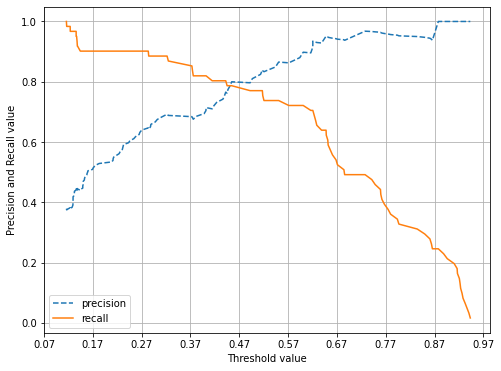

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
def precision_recall_curve_plot(y_test, pred_proba_c1):
  # Precision&Recall by threshold&threshold array
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  #X: threshold, Y:Precision&Recall
  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

  #Change X's Scale to 0.1 units
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  # Set label, legend, grid
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

# F1 Score

In [98]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'F1 Score : {f1:.4f}')

F1 Score : 0.7966


In [99]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  #F1 score
  f1 = f1_score(y_test,pred)
  print('confusion matrix')
  print(confusion)
  #print F1 score
  print(f'accuracy:{accuracy:.4f}, precision:{precision:.4f}, recall : {recall:.4f}, f1 score :{f1:.4f}\n')

thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_theshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

Threshold : 0.4
confusion matrix
[[97 21]
 [11 50]]
accuracy:0.8212, precision:0.7042, recall : 0.8197, f1 score :0.7576

Threshold : 0.45
confusion matrix
[[105  13]
 [ 13  48]]
accuracy:0.8547, precision:0.7869, recall : 0.7869, f1 score :0.7869

Threshold : 0.5
confusion matrix
[[108  10]
 [ 14  47]]
accuracy:0.8659, precision:0.8246, recall : 0.7705, f1 score :0.7966

Threshold : 0.55
confusion matrix
[[111   7]
 [ 16  45]]
accuracy:0.8715, precision:0.8654, recall : 0.7377, f1 score :0.7965

Threshold : 0.6
confusion matrix
[[113   5]
 [ 17  44]]
accuracy:0.8771, precision:0.8980, recall : 0.7213, f1 score :0.8000



# ROC(Receiver Operation Characteristic) curve & AUC(Area Under Curve) Score

In [100]:
from sklearn.metrics import roc_curve

# predict probability by label 1
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# Take 10 samples at a 5-step interval
# np.arange start 1, because thresholds[0] is max(pred_proba)+1
thr_index = np.arange(1, thresholds.shape[0],5)
print("samples threshold's index:",thr_index)
print("sample's threshold:", np.round(thresholds[thr_index],2))

# FPR, TPR by sample thresholds(;5 step interval)
print('FPR:', np.round(fprs[thr_index],3))
print('TPR:', np.round(tprs[thr_index],3))

samples threshold's index: [ 1  6 11 16 21 26 31 36 41 46]
sample's threshold: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


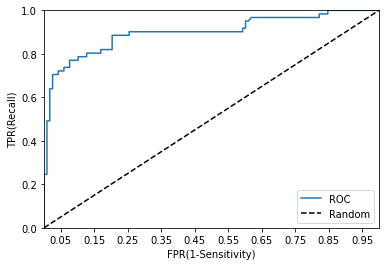

In [101]:
def roc_curve_plot(y_test, pred_proba_c1):
  # FPR, TPR by threshold
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  # Draw ROC curve
  plt.plot(fprs, tprs, label='ROC')
  # Draw a diagonal line
  plt.plot([0,1],[0,1],'k--',label='Random')

  #Change FPR X axis's Scale to 0.1, Set legend
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])


In [0]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # Add ROC-AUC
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('confusion matrix')
  print(confusion)
  # Add ROC-AUC print
  print(f'accuracy : {accuracy:.4f}, precision:{precision:.4f}, recall : {recall:.4f}, f1:{f1:.4f}, AUC:{roc_auc:.4f}')

# Predict Pima Indian Diabetes

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./drive/My Drive/Colab Notebooks/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [104]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [105]:
# feature sets are X, label set is Y
# Outcome column is label; index -1
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=156,stratify=y)

# fit, predict, evalutation by logisticregression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

confusion matrix
[[87 13]
 [22 32]]
accuracy : 0.7727, precision:0.7111, recall : 0.5926, f1:0.6465, AUC:0.8083


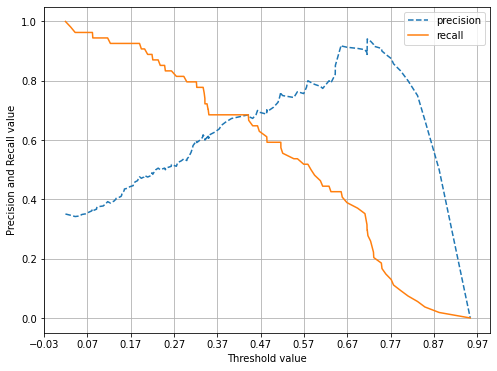

In [106]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [107]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

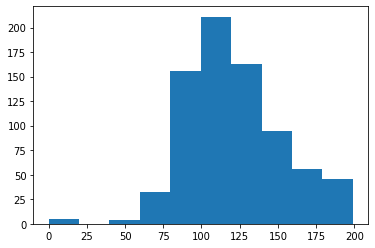

In [108]:
plt.hist(diabetes_data.Glucose, bins=10)

In [109]:
# Feature lists check for 0 values
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# Count all data
total_count = diabetes_data.Glucose.count()

# Iterate extract the number of 0 values by feature, caculate percent 
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
  print(f"{feature}'s the number of 0 values : {zero_count}, per: {100*zero_count/total_count:.2f}%")

Glucose's the number of 0 values : 5, per: 0.65%
BloodPressure's the number of 0 values : 35, per: 4.56%
SkinThickness's the number of 0 values : 227, per: 29.56%
Insulin's the number of 0 values : 374, per: 48.70%
BMI's the number of 0 values : 11, per: 1.43%


In [0]:
# Replace 0 with the mean value
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features)

In [111]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:,-1]

# Apply Scaling to feature dataset by StandardScaler class
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# train, predict, evaluate by logistic regression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

confusion matrix
[[90 10]
 [21 33]]
accuracy : 0.7987, precision:0.7674, recall : 0.6111, f1:0.6804, AUC:0.8433


In [0]:
#Error
#thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.5]
#pred_proba = lr_clf.predict_proba(X_test)
#get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

In [125]:
# Create Binarizer; threshold == 0.48
binarizer = Binarizer(threshold=0.48)

# Convert the column value corresponding to 1 to Binarizer in the predicted probability array obtained above.
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

confusion matrix
[[88 12]
 [19 35]]
accuracy : 0.7987, precision:0.7447, recall : 0.6481, f1:0.6931, AUC:0.8433
